In [12]:
# %% neo python (one time install)
# ! pip3 install neo
# %% allen brain institute (one time install)
# !pip install efel --user
# !pip install git+git://github.com/BlueBrain/eFEL --user
# !pip3 install pyabf
# !pip3 install chart_studio

In [71]:
# # %% you can see all the features here
# efel.getFeatureNames()


In [3]:
#%%
from neo import io
import numpy as np
import matplotlib.pyplot as plt
import efel
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
import scipy.optimize as opt       # root-finding algorithm
import pyabf
import seaborn as sns
import os.path
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

In [65]:
#%% define the path to long suares
# a trace with a test pulse
# resting_potential = -40 # the one you wrote in the notebook
# Capacitance_observed = 57 # the one you wrote in the notebook
# input_resistance_observed = 300 # the one you wrote in the notebook


# ####################################### BASELINE
# condition = 'base'
# file_1HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0000" # 1 HZ
# file_PPR50 ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0001" # PPR50 ms
# file_PPR100 ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0002" # PPR100 ms
# file_PPR200 ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0003" # PPR200 ms
# file_PPR400 ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0004" # PPR400 ms

# file_500ms ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0005" # @ 40 HZ
# file_1s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0006" # @ 40 HZ
# file_2s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0007" # @ 40 HZ
# file_4s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0008" # @ 40 HZ

# file_5HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0009" # 8 s
# file_10HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0010" # 4 s
# file_20HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0011" # 2 s
# file_40HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0012" # 1 s


####################################### EGTA_AM
condition = 'EGTA_AM'
file_1HZ ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0013" # 1 HZ

file_500ms ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0014" # @ 40 HZ
file_1s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0015" # @ 40 HZ
file_2s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0016" # @ 40 HZ
file_4s ="07222024_male_WT_mPFC_SST_ChR2_eYFP__0017" # @ 40 HZ




path = r'Z:\HH\Ephys_PatchClamp\Hassan\2024\July\07.22.2024'
save_path = r'Z:\HH\Ephys_PatchClamp\Hassan\2024\July\07.22.2024\Cell_1' # DEFINE the file directory for saving

################################
# %% Exporting data to Excell for analysis
# writer = pd.ExcelWriter(os.path.join(save_path, file_L + condition + '.xlsx'))
#####################################################

file_name1HZ =    path + "\\" + file_1HZ +'.abf'
file_namePPR50 =  path + "\\" + file_PPR50 +'.abf'
file_namePPR100 =  path + "\\" + file_PPR100 +'.abf'
file_namePPR200 =  path + "\\" + file_PPR200 +'.abf'
file_namePPR400 =  path + "\\" + file_PPR400 +'.abf'

file_name500ms =  path + "\\" + file_500ms +'.abf'
file_name1s =    path + "\\" + file_1s +'.abf'
file_name2s =  path + "\\" + file_2s +'.abf'
file_name4s =  path + "\\" + file_4s +'.abf'

file_name5HZ =  path + "\\" + file_5HZ +'.abf'
file_name10HZ =   path + "\\" + file_10HZ +'.abf'
file_name20HZ =    path + "\\" + file_20HZ +'.abf'
file_name40HZ =   path + "\\" + file_40HZ +'.abf'


#Take alook at the data
# print(abfL)
abf1HZ =    pyabf.ABF(path + "\\" + file_1HZ +'.abf')
abfPPR50 =  pyabf.ABF(path + "\\" + file_PPR50 +'.abf')
abfPPR100 =  pyabf.ABF(path + "\\" + file_PPR100 +'.abf')
abfPPR200 =  pyabf.ABF(path + "\\" + file_PPR200 +'.abf')
abfPPR400 =  pyabf.ABF(path + "\\" + file_PPR400 +'.abf')

abf500ms =  pyabf.ABF(path + "\\" + file_500ms +'.abf')
abf1s =    pyabf.ABF(path + "\\" + file_1s +'.abf')
abf2s =  pyabf.ABF(path + "\\" + file_2s +'.abf')
abf4s =  pyabf.ABF(path + "\\" + file_4s +'.abf')

abf5HZ =  pyabf.ABF(path + "\\" + file_5HZ +'.abf')
abf10HZ =   pyabf.ABF(path + "\\" + file_10HZ +'.abf')
abf20HZ =    pyabf.ABF(path + "\\" + file_20HZ +'.abf')
abf40HZ =   pyabf.ABF(path + "\\" + file_40HZ +'.abf')



In [66]:
#################################################### 1HZ
r = io.AxonIO(filename=file_name1HZ)
bl = r.read_block(lazy=False)

data_1HZ = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_1HZ.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### PPR50
r = io.AxonIO(filename=file_namePPR50)
bl = r.read_block(lazy=False)

data_PPR50 = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_PPR50.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### PPR100
r = io.AxonIO(filename=file_namePPR100)
bl = r.read_block(lazy=False)

data_PPR100 = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_PPR100.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### PPR200
r = io.AxonIO(filename=file_namePPR200)
bl = r.read_block(lazy=False)

data_PPR200 = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_PPR200.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### PPR400
r = io.AxonIO(filename=file_namePPR400)
bl = r.read_block(lazy=False)

data_PPR400 = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_PPR400.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 500ms
r = io.AxonIO(filename=file_name500ms)
bl = r.read_block(lazy=False)

data_500ms = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_500ms.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 1s
r = io.AxonIO(filename=file_name1s)
bl = r.read_block(lazy=False)

data_1s = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_1s.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 2s
r = io.AxonIO(filename=file_name2s)
bl = r.read_block(lazy=False)

data_2s = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_2s.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 4s
r = io.AxonIO(filename=file_name4s)
bl = r.read_block(lazy=False)

data_4s = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_4s.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 5 HZ
r = io.AxonIO(filename=file_name5HZ)
bl = r.read_block(lazy=False)

data_5HZ = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_5HZ.append({'v': voltage,
                 'i': current,
                 't': time})
    
#################################################### 10 HZ
r = io.AxonIO(filename=file_name10HZ)
bl = r.read_block(lazy=False)

data_10HZ = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_10HZ.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 20 HZ
r = io.AxonIO(filename=file_name20HZ)
bl = r.read_block(lazy=False)

data_20HZ = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_20HZ.append({'v': voltage,
                 'i': current,
                 't': time})
#################################################### 40 HZ
r = io.AxonIO(filename=file_name40HZ)
bl = r.read_block(lazy=False)

data_40HZ = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data_40HZ.append({'v': voltage,
                 'i': current,
                 't': time})



# 1HZ

[680.2028542007638]
[5.899999999994634]


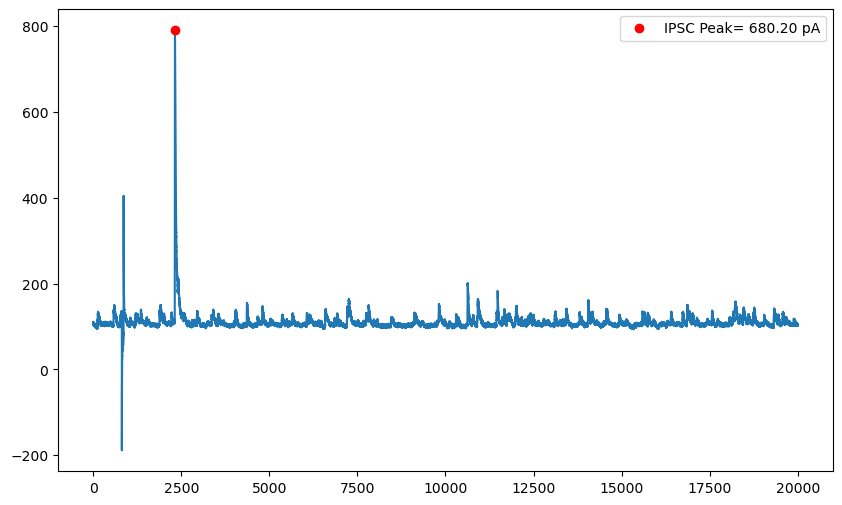

In [67]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
#%% changing window size parameters
efel.setThreshold(500.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.1)



ton1 = 2312.5
toff1 = 3000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)
eIPSC_rise = []
eIPSC_height = []



fel_vals1 =[]
pdf_pages = PdfPages(os.path.join(save_path, condition + '_1HZ.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data_1HZ[0:1]):
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace['v'],
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
    fig = plt.figure(figsize=(10, 6))
    plt.plot(trace['t'], trace['v'])
    try:
########################################################################################################## 1st interval
        for time in range (len(fel_val1[0]['peak_time'])): 
            plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or',
                    label='IPSC Peak= %5.2f pA' % (fel_val1[0]['AP_height'] - fel_val1[0]['voltage_base'])) # AP Peak

            pdf_pages.savefig(fig)

            if fel_val1[0]['AP_rise_time'] is not None:
                IPSC_rise1 = (fel_val1[0]['AP_rise_time'])
                eIPSC_rise.append(IPSC_rise1[0])
            else:
                pass 
            if fel_val1[0]['AP_height'] is not None:
                IPSC_height1 = (fel_val1[0]['AP_height'] - fel_val1[0]['voltage_base']) #The adaptation index is zero for a constant firing rate and bigger than zero for a decreasing firing rate
                eIPSC_height.append(IPSC_height1[0])
            else:
                pass
            
    except:
        pass
pdf_pages.close()
plt.legend()
print(eIPSC_height)
print(eIPSC_rise)

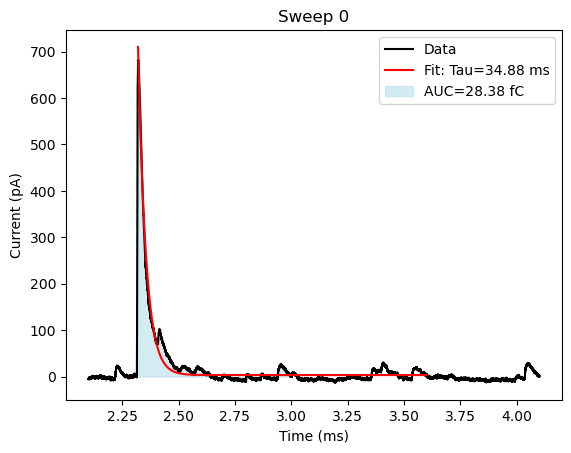

Decay Tau: 34.88 ms
Area Under Curve: 28.38 fC
Final Decay Tau: 34.88 ms
Final Area Under Curve: 28.38 fC


In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the single exponential function
def func_single_exp(x, A, tau, c):
    """
    Single exponential function for fitting a decaying signal.

    Parameters:
    x : array_like
        The independent variable (time).
    A : float
        Amplitude of the exponential decay.
    tau : float
        Time constant of the exponential decay.
    c : float
        Offset or baseline value.

    Returns:
    y : array_like
        The evaluated function at x.
    """
    return A * np.exp(-x / tau) + c
pdf_pages = PdfPages(os.path.join(save_path, condition + '1HZ_auc.pdf'))
# Example data rate (sampling rate in Hz)
sr = abf1HZ.dataRate  # SAMPLING rate in Hz
start_base = int(2 * sr)
end_base = int(2.2 * sr)

startt = int(2.1 * sr)
endd = int(4.1 * sr)

start_area = int(2.32 * sr)  # ~ 10% to 20% OF THE MAXIMUM VOLTAGE DEFLECTION
end_area = int(3.0 * sr)  # ADJUST THE NUMBER

start_fit = int(2.32 * sr)  # ~ 10% to 20% OF THE MAXIMUM VOLTAGE DEFLECTION
end_fit = int(3.6 * sr)  # ADJUST THE NUMBER

for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    abf1HZ.setSweep(sweepNumber=i, channel=0)

    # Calculate the baseline
    baseline = np.mean(abf1HZ.sweepY[start_base:end_base])

    # Subtract the baseline from the signal
    adjusted_signal = abf1HZ.sweepY - baseline

    fig1 = plt.figure()

    # Plot the original data with baseline subtracted
    plt.plot(abf1HZ.sweepX[startt:endd], adjusted_signal[startt:endd],  c='k', label='Data')

    # Initial guess for the parameters [A, tau, c]
    initial_guess = [
        np.max(adjusted_signal[start_fit:end_fit]) - np.min(adjusted_signal[start_fit:end_fit]),  # A
        (abf1HZ.sweepX[end_fit] - abf1HZ.sweepX[start_fit]) / 10,  # tau
        np.mean(adjusted_signal[start_fit:end_fit])  # c
    ]

    # Fit the data using curve_fit with error handling
    try:
        popt, pcov = curve_fit(
            func_single_exp,
            abf1HZ.sweepX[start_fit:end_fit],
            adjusted_signal[start_fit:end_fit],
            p0=initial_guess,
            maxfev=50000  # Increase the number of function evaluations
        )
    except RuntimeError as e:
        print(f"Fit failed for sweep {i}: {e}")
        continue

    # Generate fitted curve
    fit_curve = func_single_exp(abf1HZ.sweepX[start_fit:end_fit], *popt)
    plt.plot(abf1HZ.sweepX[start_fit:end_fit], fit_curve, 'r-', label=f'Fit: Tau={popt[1] * 1e3:.2f} ms')

    # Calculate and plot the area under the curve (AUC) from start to end
    x_area = abf1HZ.sweepX[start_area:end_area]
    y_area = adjusted_signal[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=0.5, label=f'AUC={auc:.2f} fC')

    # Adding details to the plot
    plt.title(f'Sweep {i}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend()
    plt.show()

    print(f"Decay Tau: {popt[1] * 1e3:.2f} ms")
    print(f"Area Under Curve: {auc:.2f} fC")

IPSC_decay_tau = popt[1] * 1e3
IPSC_auc = auc

print(f"Final Decay Tau: {IPSC_decay_tau:.2f} ms")
print(f"Final Area Under Curve: {IPSC_auc:.2f} fC")
pdf_pages.savefig(fig1)
pdf_pages.close()


# PPR 50 ms

4 or more spikes are needed for burst calculation.


[  7.6467 217.9128]


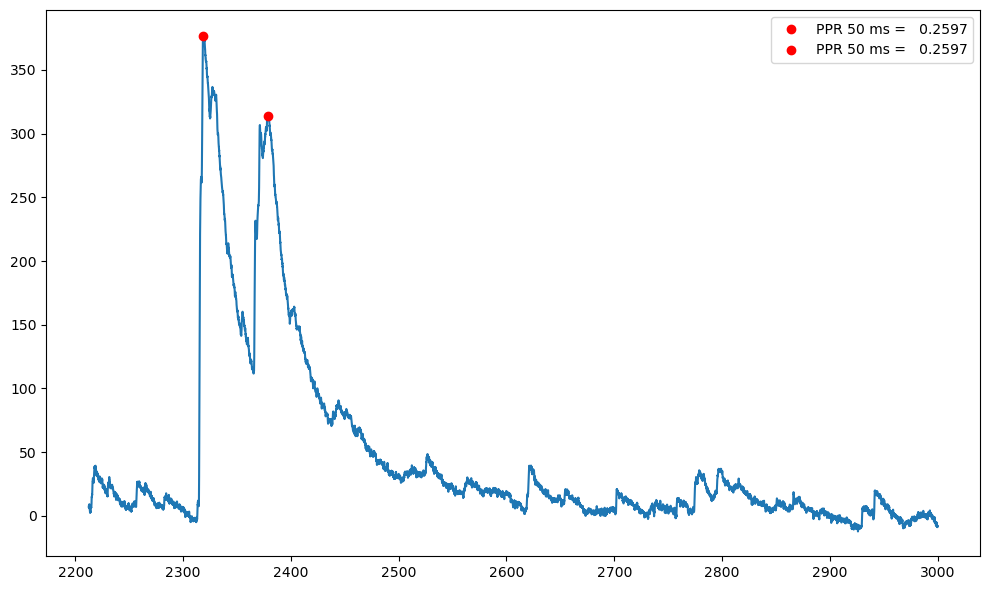

In [12]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

ton1 = 2212.5
toff1 = 3000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)

sr = abf1HZ.dataRate  # SAMPLING rate in Hz
start_base_idx = int(2 * sr)
end_base_idx = int(2.2 * sr)


#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.5)


##################################
data = data_PPR50
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + 'PPR50.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AP1_begin_voltage']
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
PPR50 = IPSC_heights[1]/IPSC_heights[0]    

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:

########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or', 
                label = f'PPR 50 ms =  {PPR50: .4f}') # AP Peak

        


except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()
print(fel_val1[0]['AP_begin_voltage'])


# PPR 100 ms

4 or more spikes are needed for burst calculation.


[416.8969 309.1698]


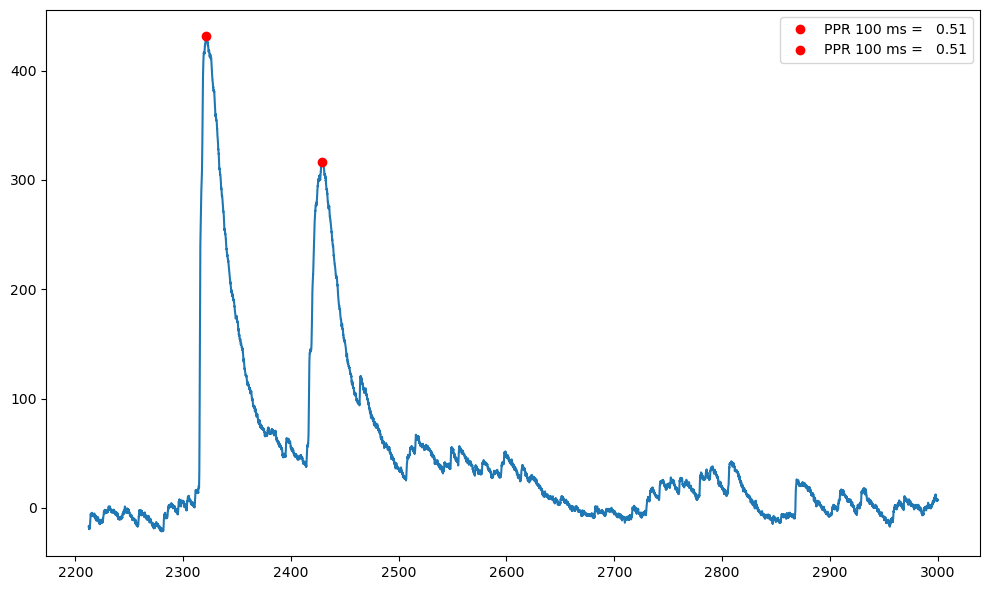

In [13]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

ton1 = 2212.5
toff1 = 3000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)

#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.1)

##################################
data = data_PPR100
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + 'PPR100.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AHP1_depth_from_peak', 'AP2_begin_voltage',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
PPR100 = IPSC_heights[1]/IPSC_heights[0]    

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:

########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or', 
                label = f'PPR 100 ms =  {PPR100: .2f}') # AP Peak



except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()
print(fel_val1[0]['AP_begin_voltage'])

# PPR 200 ms

4 or more spikes are needed for burst calculation.


array([483.2212, 338.873 ])

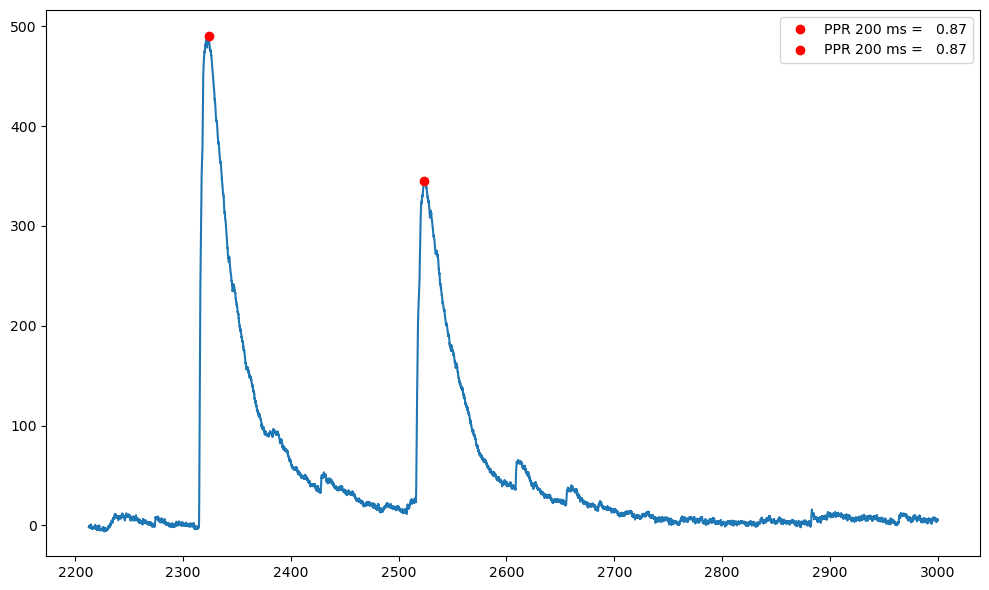

In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

ton1 = 2212.5
toff1 = 3000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)

#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.1)

##################################
data = data_PPR200
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + 'PPR200.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AHP1_depth_from_peak', 'AP2_begin_voltage',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
PPR200 = IPSC_heights[1]/IPSC_heights[0]    

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:

########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or', 
                label = f'PPR 200 ms =  {PPR200: .2f}') # AP Peak



except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()
IPSC_voltage_base

# PPR 400 ms

4 or more spikes are needed for burst calculation.


array([548.0531, 400.0429])

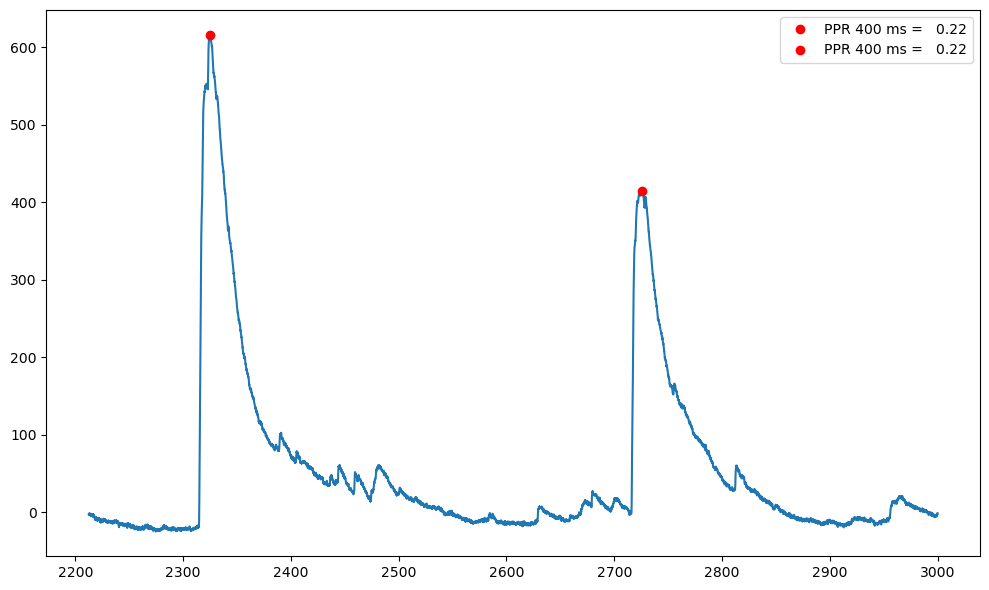

In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

ton1 = 2212.5
toff1 = 3000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)

#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.1)

##################################
data = data_PPR400
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + 'PPR400.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AHP1_depth_from_peak', 'AP2_begin_voltage',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
PPR400 = IPSC_heights[1]/IPSC_heights[0]    

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:

########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or', 
                label = f'PPR 400 ms =  {PPR400: .2f}') # AP Peak



except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()
IPSC_voltage_base

# 5 HZ Peaks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


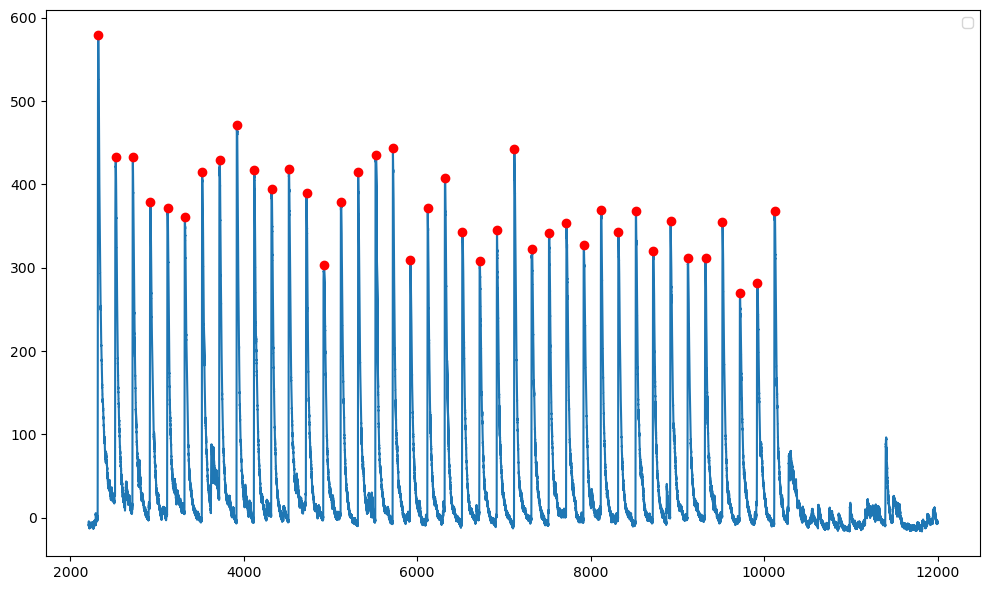

In [16]:
ton1 = 2212.5
toff1 = 12000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)
IPSC_rise = []
IPSC_height = []

#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.5)

##################################
data = data_5HZ
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + '5HZ.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AHP1_depth_from_peak', 'AP2_begin_voltage',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
IPSC_heights_norm_5HZ = IPSC_heights/IPSC_heights[0] 
    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:
########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or') # AP Peak


except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()

# 10 HZ Peaks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


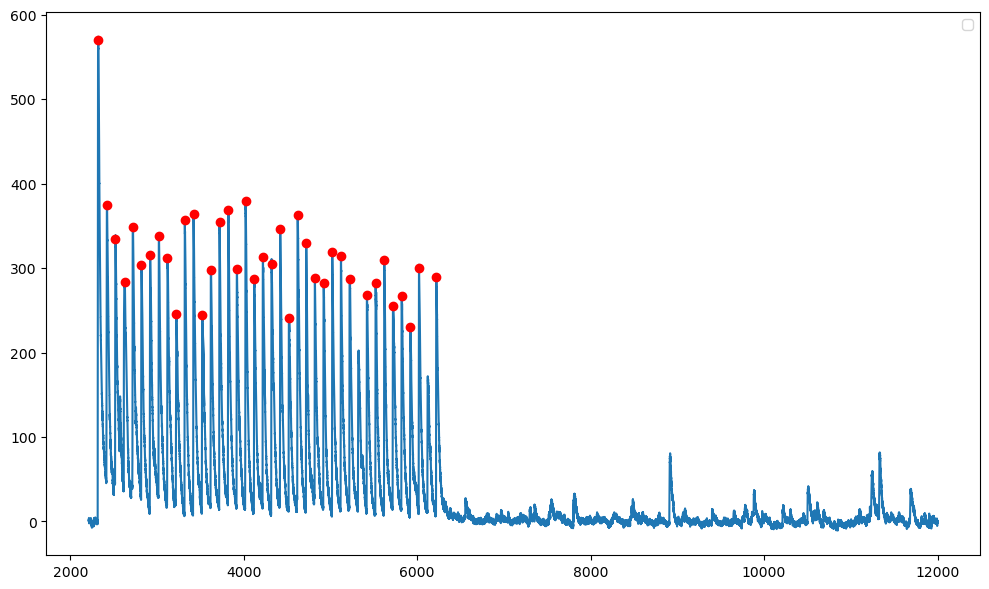

In [24]:
ton1 = 2212.5
toff1 = 12000.
ton_idx1 = int(ton1 / dt / 1e3)
toff_idx1 = int(toff1 / dt / 1e3)
IPSC_rise = []
IPSC_height = []

#%% changing window size parameters

efel.setThreshold(200.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 1.5)

##################################
data = data_10HZ
##################################

pdf_pages = PdfPages(os.path.join(save_path, condition + '10HZ.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[0:1]):
    
    baseline_mean = np.mean(trace['v'][start_base_idx:end_base_idx])

    # Baseline correction for the trace
    trace_corrected = trace['v'] - baseline_mean
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak', 'Spikecount',
                            'time_to_first_spike' ,'AP_phaseslope','burst_number', 'sag_amplitude', 'decay_time_constant_after_stim', 
                             'irregularity_index', 'ohmic_input_resistance', 'Spikecount', 'AP_duration', 'AP_duration_change',
                            'AP_fall_rate', 'AP_rise_rate', 'AHP1_depth_from_peak', 'AP2_begin_voltage',]
    efel_trace1 = [{'T': trace['t'],
                   'V': trace_corrected,
                   'stim_start': [ton1],
                   'stim_end': [toff1]}]
    fel_val1 = efel.getFeatureValues(efel_trace1,
                                     interesting_efeatures,
                                     raise_warnings=False)
    fel_vals1.append(fel_val1)
    
IPSC_voltage_base = fel_val1[0]['AP_begin_voltage']
IPSC_height = fel_val1[0]['AP_height'] 
IPSC_heights = IPSC_height - IPSC_voltage_base 
IPSC_heights_norm_10HZ = IPSC_heights/IPSC_heights[0] 
    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
fig = plt.figure(figsize=(10, 6))
plt.plot(trace['t'][ton_idx1:toff_idx1], trace_corrected[ton_idx1:toff_idx1])
try:
########################################################################################################## 1st interval
    for time in range (len(fel_val1[0]['peak_time'])): 
        plt.plot(fel_val1[0]['peak_time'][time], fel_val1[0]['AP_height'][time], 'or') # AP Peak


except:
    pass
plt.tight_layout()
plt.legend()
pdf_pages.savefig(fig)
pdf_pages.close()

# 0.5 s @ 40 HZ

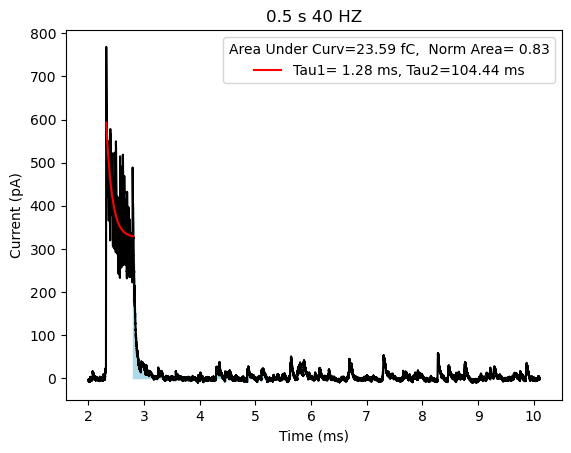

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf500ms  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(10.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = int(2.8 * sr)  # ADJUST THE NUMBER

start_area = int(2.8 * sr)  
end_area = int(5.2 * sr)  

start_base = int(2 * sr)  
end_base = int(2.1 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_500ms.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
#     initial_guess = [np.min(adjusted_sweepY[start:end]), 0.001, np.min(adjusted_sweepY[start:end]), 1, np.mean(adjusted_sweepY[start:end])]
    initial_guess = [
    np.max(adjusted_signal[start_fit:end_fit]),  # a1
    (abf1HZ.sweepX[end_fit] - abf1HZ.sweepX[start_fit]) / 1000,  # b1
    np.max(adjusted_signal[start_fit:end_fit]) / 2,  # a2
    1.0,  # b2
    np.mean(adjusted_signal[start_fit:end_fit])  # c
    ]
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start:end], adjusted_sweepY[start:end], p0=initial_guess, maxfev=10000)

    plt.plot(filename.sweepX[start:end], func_double_exp(filename.sweepX[start:end], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('0.5 s 40 HZ')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    
    plt.show()

Tetanic_500ms_decay_tau_fast = popt[1]*1e3
Tetanic_500ms__decay_tau_slow = popt[3]*1e3
Tetanic_500ms__auc =  auc/IPSC_auc
Tetanic_500ms__auc_NOTnormed =  auc



plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()


# 1 s @ 40 HZ

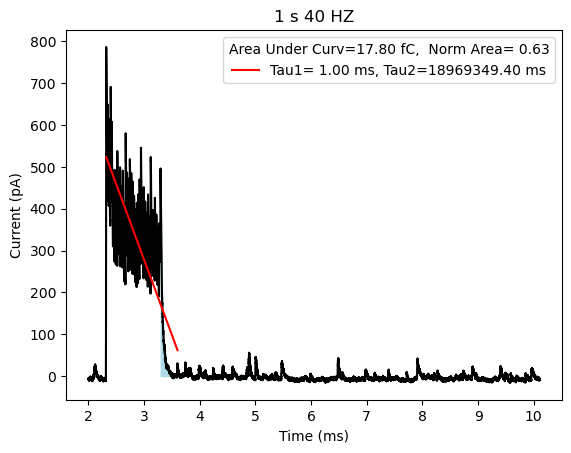

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf1s  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(10.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = int(3.3 * sr)  # ADJUST THE NUMBER

start_area = int(3.3 * sr)  
end_area = int(5.3 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_1s.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.min(adjusted_sweepY[start:end]), 0.001, np.min(adjusted_sweepY[start:end]), 1, np.mean(adjusted_sweepY[start:end])]

    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], p0=initial_guess, maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('1 s 40 HZ')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_1s_decay_tau_fast = popt[1]*1e3
Tetanic_1s__decay_tau_slow = popt[3]*1e3
Tetanic_1s__auc =  auc/IPSC_auc
Tetanic_1s__auc_NOTnormed =  auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 2 s @ 40 HZ

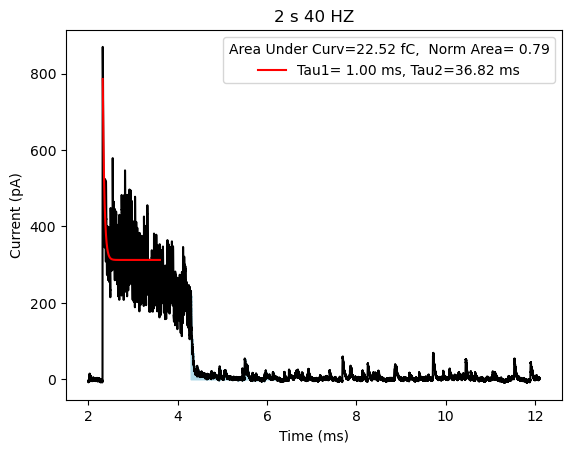

<Figure size 640x480 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf2s  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(12.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = int(4.3 * sr)  # ADJUST THE NUMBER

start_area = int(4.29 * sr)  
end_area = int(6.29 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_2s.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('2 s 40 HZ')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_2s_decay_tau_fast = popt[1]*1e3
Tetanic_2s__decay_tau_slow = popt[3]*1e3
Tetanic_2s__auc =  auc/IPSC_auc
Tetanic_2s__auc_NOTnormed =  auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 4 s @ 40 HZ

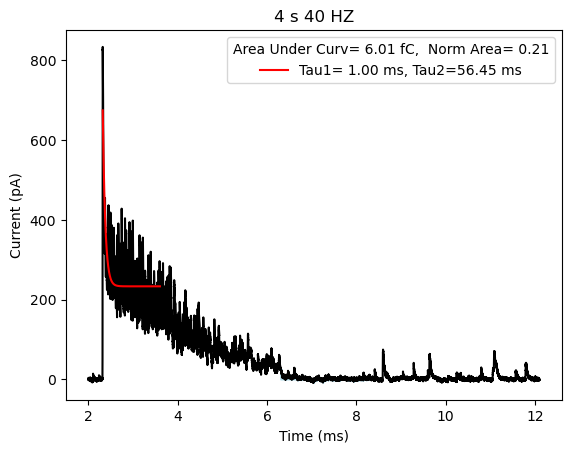

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf4s  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(12.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = int(6.3 * sr)  # ADJUST THE NUMBER

start_area = int(6.3 * sr)  
end_area = int(8.3 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_4s.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('4 s 40 HZ')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_4s_decay_tau_fast = popt[1]*1e3
Tetanic_4s__decay_tau_slow = popt[3]*1e3
Tetanic_4s__auc =  auc/IPSC_auc
Tetanic_4s__auc_NOTnormed =  auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 5 HZ for 8 s

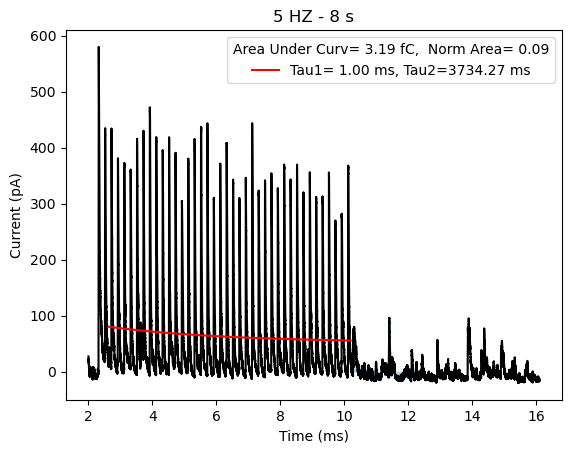

<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf5HZ  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(16.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end_fit = int(10.2 * sr)  # ADJUST THE NUMBER

start_area = int(10.2 * sr)  
end_area = int(12.2 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_5HZ.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('5 HZ - 8 s')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_5HZ_decay_tau_fast = popt[1]*1e3
Tetanic_5HZ__decay_tau_slow = popt[3]*1e3
Tetanic_5HZ__auc =  auc/IPSC_auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 10 HZ for 4 s

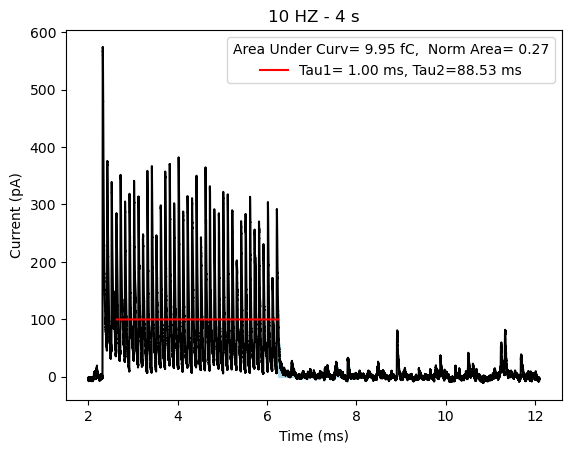

<Figure size 640x480 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf10HZ  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(12.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end_fit = int(6.25 * sr)  # ADJUST THE NUMBER

start_area = int(6.25 * sr)  
end_area = int(8.25 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_10HZ.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('10 HZ - 4 s')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_10HZ_decay_tau_fast = popt[1]*1e3
Tetanic_10HZ__decay_tau_slow = popt[3]*1e3
Tetanic_10HZ__auc =  auc/IPSC_auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 20 HZ for 2 s

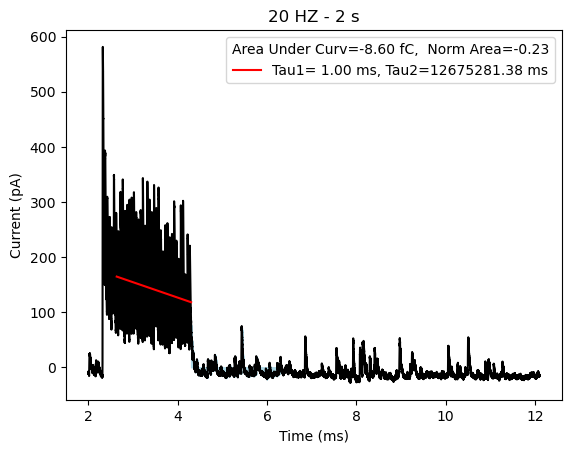

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf20HZ  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(12.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end_fit = int(4.3 * sr)  # ADJUST THE NUMBER

start_area = int(4.3 * sr)  
end_area = int(6.3 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_20HZ.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('20 HZ - 2 s')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_20HZ_decay_tau_fast = popt[1]*1e3
Tetanic_20HZ__decay_tau_slow = popt[3]*1e3
Tetanic_20HZ__auc =  auc/IPSC_auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# 40 HZ for 1 s

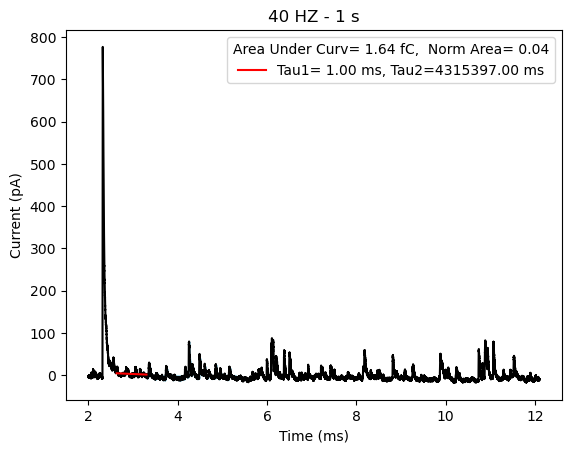

<Figure size 640x480 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Define the double exponential function
def func_double_exp(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-x / b1) + a2 * np.exp(-x / b2) + c

filename = abf40HZ  # Example placeholder for your actual data object
# Example data rate (sampling rate in Hz)
sr = filename.dataRate  # SAMPLING rate in Hz
startt = int(2.0 * sr) 
endd = int(12.1 * sr) 

start = int(2.32 * sr)  # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end_fit = int(3.3 * sr)  # ADJUST THE NUMBER

start_area = int(3.3 * sr)  
end_area = int(5.3 * sr)  

start_base = int(2 * sr)  
end_base = int(2.2 * sr)  

tau = []

pdf_pages = PdfPages(os.path.join(save_path, condition + '_Tetanic_40HZ.pdf'))
for i in range(0, 1):  # the number of sweeps in hyperpolarization steps
    filename.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    
    # Calculate baseline
    baseline_values = filename.sweepY[start_base:end_base]
    baseline = np.mean(baseline_values)
    
    # Subtract baseline from the entire sweep
    adjusted_sweepY = filename.sweepY - baseline
    
    plt.plot(filename.sweepX[startt:endd], adjusted_sweepY[startt:endd],  c='k')

    # Initial guess for the parameters [a1, b1, a2, b2, c]
    initial_guess = [np.max(adjusted_sweepY[start_fit:end_fit]), 0.001, np.min(adjusted_sweepY[start_fit:end_fit]), 1, baseline]
    
    # Fit the data
    popt, pcov = curve_fit(func_double_exp, filename.sweepX[start_fit:end_fit], adjusted_sweepY[start_fit:end_fit], 
                           p0=initial_guess, 
                           maxfev=10000)

    plt.plot(filename.sweepX[start_fit:end_fit], func_double_exp(filename.sweepX[start_fit:end_fit], *popt), 'r-',
             label='Tau1=%5.2f ms, Tau2=%5.2f ms' % (popt[1]*1e3, popt[3]*1e3))
    tau.append((popt[1], popt[3]))

    # Calculate area under the curve between start_area and end_area
    x_area = filename.sweepX[start_area:end_area]
    y_area = adjusted_sweepY[start_area:end_area]
    auc = simps(y_area, x_area)  # Using Simpson's rule for numerical integration

    # Plotting the area under the curve
    plt.fill_between(x_area, y_area, color='lightblue', alpha=1.)

    # Adding the AUC to the legend
    plt.title('40 HZ - 1 s')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Area Under Curv=%5.2f fC,  Norm Area=%5.2f' % (auc, auc/IPSC_auc)) #ms*pA 
    plt.show()

Tetanic_40HZ_decay_tau_fast = popt[1]*1e3
Tetanic_40HZ__decay_tau_slow = popt[3]*1e3
Tetanic_40HZ__auc =  auc/IPSC_auc


plt.tight_layout()
pdf_pages.savefig(fig1)
pdf_pages.close()

# Saving

In [64]:
################################
#%% Exporting data to Excell for analysis
writer = pd.ExcelWriter(os.path.join(save_path, condition + '.xlsx'))


pd.DataFrame({'IPSC_height (pA)': 
              eIPSC_height}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=0,index=False)
pd.DataFrame({'IPSC_rise_tau (ms)': 
              eIPSC_rise}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=1,index=False)
pd.DataFrame({'IPSC_decay_tau (ms)': 
              [IPSC_decay_tau]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=2,index=False)
pd.DataFrame({'IPSC_auc (fC)': 
              [IPSC_auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=3,index=False)
pd.DataFrame({'PPR50': 
              [PPR50]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=4,index=False)
pd.DataFrame({'PPR100': 
              [PPR100]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=5,index=False)
pd.DataFrame({'PPR200': 
              [PPR200]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=6,index=False)
pd.DataFrame({'PPR400': 
              [PPR400]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=7,index=False)
pd.DataFrame({'IPSC_heights_norm_5HZ': 
              IPSC_heights_norm_5HZ}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=8,index=False)
pd.DataFrame({'IPSC_heights_norm_10HZ': 
              IPSC_heights_norm_10HZ}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=9,index=False)




pd.DataFrame({'Tetanic_500ms__auc': 
              [Tetanic_500ms__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=0,index=False)
pd.DataFrame({'Tetanic_1s__auc': 
              [Tetanic_1s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=1,index=False)
pd.DataFrame({'Tetanic_2s__auc': 
              [Tetanic_2s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=2,index=False)
pd.DataFrame({'Tetanic_4s__auc': 
              [Tetanic_4s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=3,index=False)
pd.DataFrame({'Tetanic_5HZ__auc': 
              [Tetanic_5HZ__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=4,index=False)
pd.DataFrame({'Tetanic_10HZ__auc': 
              [Tetanic_10HZ__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=5,index=False)
pd.DataFrame({'Tetanic_20HZ__auc': 
              [Tetanic_20HZ__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=6,index=False)
pd.DataFrame({'Tetanic_40HZ__auc': 
              [Tetanic_40HZ__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=7,index=False)
pd.DataFrame({'Tetanic_500ms__auc_NOTnomed': 
              [Tetanic_500ms__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=8,index=False)
pd.DataFrame({'Tetanic_1s__auc_NOTnomed': 
              [Tetanic_1s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=9,index=False)
pd.DataFrame({'Tetanic_2s__auc_NOTnomed': 
              [Tetanic_2s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=10,index=False)
pd.DataFrame({'Tetanic_4s__auc_NOTnomed': 
              [Tetanic_4s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=11,index=False)


pd.DataFrame({'Tetanic_500ms__decay_tau_slow': 
              [Tetanic_500ms__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=12,index=False)
pd.DataFrame({'Tetanic_1s__decay_tau_slow': 
              [Tetanic_1s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=13,index=False)
pd.DataFrame({'Tetanic_2s__decay_tau_slow': 
              [Tetanic_2s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=14,index=False)
pd.DataFrame({'Tetanic_4s__decay_tau_slow': 
              [Tetanic_4s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=15,index=False)
pd.DataFrame({'Tetanic_5HZ__decay_tau_slow': 
              [Tetanic_5HZ__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=16,index=False)
pd.DataFrame({'Tetanic_10HZ__decay_tau_slow': 
              [Tetanic_10HZ__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=17,index=False)
pd.DataFrame({'Tetanic_20HZ__decay_tau_slow': 
              [Tetanic_20HZ__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=18,index=False)
pd.DataFrame({'Tetanic_40HZ__decay_tau_slow': 
              [Tetanic_40HZ__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=19,index=False)



writer.save()



# Saving EGTA_AM

In [73]:
################################
#%% Exporting data to Excell for analysis
writer = pd.ExcelWriter(os.path.join(save_path, condition + '.xlsx'))


pd.DataFrame({'IPSC_height (pA)': 
              eIPSC_height}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=0,index=False)
pd.DataFrame({'IPSC_rise_tau (ms)': 
              eIPSC_rise}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=1,index=False)
pd.DataFrame({'IPSC_decay_tau (ms)': 
              [IPSC_decay_tau]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=2,index=False)
pd.DataFrame({'IPSC_auc (fC)': 
              [IPSC_auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Synchronous', startcol=3,index=False)





pd.DataFrame({'Tetanic_500ms__auc': 
              [Tetanic_500ms__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=0,index=False)
pd.DataFrame({'Tetanic_1s__auc': 
              [Tetanic_1s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=1,index=False)
pd.DataFrame({'Tetanic_2s__auc': 
              [Tetanic_2s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=2,index=False)
pd.DataFrame({'Tetanic_4s__auc': 
              [Tetanic_4s__auc]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=3,index=False)



pd.DataFrame({'Tetanic_500ms__auc_NOTnormed': 
              [Tetanic_500ms__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=8,index=False)
pd.DataFrame({'Tetanic_1s__auc_NOTnormed': 
              [Tetanic_1s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=9,index=False)
pd.DataFrame({'Tetanic_2s__auc_NOTnormed': 
              [Tetanic_2s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=10,index=False)
pd.DataFrame({'Tetanic_4s__auc_NOTnormed': 
              [Tetanic_4s__auc_NOTnormed]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=11,index=False)




pd.DataFrame({'Tetanic_500ms__decay_tau_slow': 
              [Tetanic_500ms__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=12,index=False)
pd.DataFrame({'Tetanic_1s__decay_tau_slow': 
              [Tetanic_1s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=13,index=False)
pd.DataFrame({'Tetanic_2s__decay_tau_slow': 
              [Tetanic_2s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=14,index=False)
pd.DataFrame({'Tetanic_4s__decay_tau_slow': 
              [Tetanic_4s__decay_tau_slow]}).to_excel(writer,sheet_name = 
                                               'S5E2_mPFC_Asynchronous', startcol=15,index=False)



writer.save()

